In [1]:
from src.infer_models import infer
from src.preprocess import preprocess
from src.archs_models import stdlogistic
from src.opts_models_new import gradient_descent
import os
import sys
import pathlib
from pathlib import Path

import numpy as np
from numpy.core.shape_base import block
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Sans Serif"]})  # Avant Garde, Helvetica, Computer Modern Sans Serif

np.set_printoptions(precision=4)
np.set_printoptions(formatter={'float': "{:0.4f}".format})


# Ensure path is referenced to this script's root
# thisdir = os.path.dirname(__file__)
thisdir = Path.cwd()
# os.chdir(thisdir)
os.chdir(sys.path[0])
print(os.getcwd())

figs_dir = os.path.join(thisdir, 'figs/')
if not os.path.isdir(figs_dir):
    os.makedirs(figs_dir)


c:\Users\samue\Desktop\Machine Learning\Workspace\Logistic Regression\1A2


In [2]:

# Data Preprocessing
# do major feature engineering - 0 | 1
doengr = 0
donormalize = 1

# Train
rawdata = 'csvs/IA2-train.csv'
traindata, train_id = preprocess(rawdata, donormalize=donormalize, istrain=1,
                                 traininfo=None, doengr=doengr)

# View final data entering the model.
# print(traindata['X'])
# print(traindata['X'].shape)

# Dev
rawdata = 'csvs/IA2-dev.csv'
devdata, dev_id = preprocess(rawdata, donormalize=donormalize, istrain=0,
                             traininfo=traindata, doengr=doengr)



data size (rows,columns) (6000, 198)
                    Vehicle_Damage  Previously_Insured  Vehicle_Age_0  \
Vehicle_Damage            1.000000           -0.858465       0.305893   
Previously_Insured       -0.858465            1.000000      -0.313266   
Vehicle_Age_0             0.305893           -0.313266       1.000000   
Vehicle_Age_1            -0.418453            0.418906      -0.855960   
Vehicle_Age_2             0.177294           -0.164105      -0.348569   
Response                  0.598229           -0.583561       0.255089   

                    Vehicle_Age_1  Vehicle_Age_2  Response  
Vehicle_Damage          -0.418453       0.177294  0.598229  
Previously_Insured       0.418906      -0.164105 -0.583561  
Vehicle_Age_0           -0.855960      -0.348569  0.255089  
Vehicle_Age_1            1.000000      -0.186254 -0.341008  
Vehicle_Age_2           -0.186254       1.000000  0.133442  
Response                -0.341008       0.133442  1.000000  
data size (rows,columns)

In [3]:

# DEV: Model Training and Selection

# - max. number of iterations (fixed) - epochs
epochs = int(5e3)

# - learning-rate (step-size) selection set
# lrs =  [5e-3, 1e-2, 2e-2, 0.1, 0.5]

# learning rate
stepsize = 1e-1

# - regularization scale size selection set
lregs = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]

# regsize = 0.01 # 1e-1 to 1e-2 to 1e-3

# Turns out lists and dicts are passed by ref. in python.
# They behave as global variables, modified in function they are passed to.

# model's number of largest weighted features
bigks = 5

# list to hold all models
model_sels = []

# regularization rate
regtype = 1
#regtype = 2
# regtype = 3

# - random weight initialization
W = np.random.uniform(0, 0.02, (traindata['cols'], 1))
W[0] = np.zeros(shape=(1, 1))
#print(W[0])


In [4]:

# for stepsize in lrs:
for regsize in lregs:

    print(f'\n*******L{regtype}: Model Selection************************')
    print('(start): Regularization-scale: ', regsize)
    # print(W.T) # to debug mutability

    # - modeldict: data structure that holds details of the trained model
    modeldict = {'W': W.copy(), 'stepsize': stepsize,
                 'reg_type': regtype, 'reg_size': regsize, 'epochs': epochs,
                 'cols': traindata['cols'],
                 'normalize': traindata['scalers'],
                 'mse_train': None, 'mse_dev': None,
                 'facc_train': None, 'facc_dev': None,
                 'sparsity': None, 'bigk': bigks, 'WBigK': None, 'WBigK_feats': None
                 }

    # - train: iterative line search (full batch)
    gradient_descent(modeldict, stdlogistic, traindata, devdata)
    model_sels.append(modeldict)



*******L1: Model Selection************************
(start): Regularization-scale:  0.001
k:     0, mse(train): 0.2494, mse(dev): 0.2401 | facc(train): 0.4995, facc(dev): 0.6993
k:   200, mse(train): 0.1463, mse(dev): 0.1474 | facc(train): 0.7847, facc(dev): 0.7840
k:   400, mse(train): 0.1446, mse(dev): 0.1461 | facc(train): 0.7870, facc(dev): 0.7860
k:   600, mse(train): 0.1438, mse(dev): 0.1456 | facc(train): 0.7918, facc(dev): 0.7908
k:   800, mse(train): 0.1433, mse(dev): 0.1454 | facc(train): 0.7937, facc(dev): 0.7924
k:  1000, mse(train): 0.1430, mse(dev): 0.1452 | facc(train): 0.7945, facc(dev): 0.7926

*******L1: Model Selection************************
(start): Regularization-scale:  0.01
k:     0, mse(train): 0.2494, mse(dev): 0.2403 | facc(train): 0.4995, facc(dev): 0.7004
k:   200, mse(train): 0.1482, mse(dev): 0.1483 | facc(train): 0.7812, facc(dev): 0.7828

*******L1: Model Selection************************
(start): Regularization-scale:  0.1
k:     0, mse(train): 0.2494,

c:\Users\samue\Desktop\Machine Learning\Workspace\Logistic Regression\1A2\src\archs_models.py:30: RuntimeWarning: overflow encountered in exp
  return  1/(1 + np.exp(-v))


In [5]:


    if np.isfinite(modeldict['mse_train'][-1]):
        print(f"MSE (Train): {modeldict['mse_train'][-1]:2.4f} | "
              f"(Validation): {modeldict['mse_dev'][-1]:2.4f}")
        print(f"Class Accuracy (Train): {modeldict['facc_train'][-1]:2.4f} | "
              f"(Validation): {modeldict['facc_dev'][-1]:2.4f}")

        # print(W.T)
        print(f"Model Sparsity: {modeldict['sparsity']}")
        print('Final Learned Weights')
        # print((modeldict['W']).T)
        # Print top 5 weighted features
        print("Features (Top-5) with largest weight magnitude")
        print(modeldict['WBigK_feats'].tolist())
        wbigk_str = np.array2string(modeldict['WBigK'].flatten(),
                                    formatter={'float_kind': '{0:2.4f}'.format})
        print(wbigk_str)
        print('(end): ----\n')




MSE (Train): 0.5047 | (Validation): 0.5068
Class Accuracy (Train): 0.4953 | (Validation): 0.4932
Model Sparsity: 110
Final Learned Weights
Features (Top-5) with largest weight magnitude
['dummy', 'Region_Code_44', 'Policy_Sales_Channel_55', 'Policy_Sales_Channel_158', 'Policy_Sales_Channel_136']
[195.3148 -99.9999 99.9999 99.9997 99.9996]
(end): ----



Regularization Plot...	


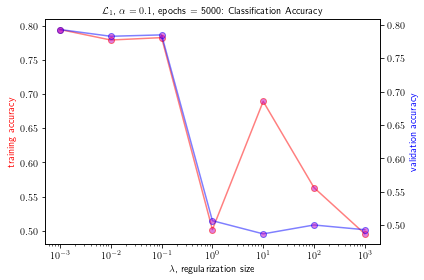

Done.

Sparsity Plot...	


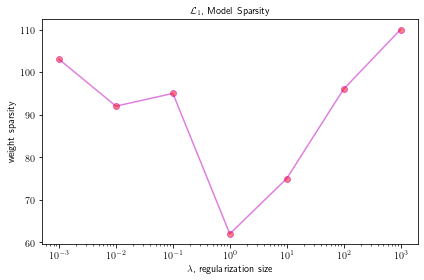

Done.



In [6]:


# Other Plots
faccs_train = []
faccs_dev = []
regular_szs = []
sparse_wts = []
for mdl in model_sels:
    faccs_train.append(mdl['facc_train'][-1])
    faccs_dev.append(mdl['facc_dev'][-1])
    sparse_wts.append(mdl['sparsity'])
    regular_szs.append(mdl['reg_size'])

print('Regularization Plot...\t')
fig, ax3 = plt.subplots(figsize=(6, 4), tight_layout=True)
ax3.semilogx(regular_szs, faccs_train,
             color='r', marker='o', markerfacecolor='m', zorder=2.5, alpha=0.5)
ax3.set_ylabel(f'training accuracy', color='r')
ax4 = ax3.twinx()
ax4.semilogx(regular_szs, faccs_dev,
             color='b', marker='o', markerfacecolor='m', zorder=2.5, alpha=0.5)
ax4.set_ylabel(f'validation accuracy', color='b')
ax3.set_xlabel(f'$\\lambda$, regularization size')
ax3.set_title(f"$\\mathcal{{L}}_{{{regtype:1d}}}$, $\\alpha = {stepsize:2.1g}$, epochs = {epochs}: Classification Accuracy",
              color='k', weight='bold', size=10)
# plt.ion
plt.savefig(figs_dir + f"L{regtype}_trainvalcmp_plt.pdf", bbox_inches='tight')
plt.show(block=False)
print('Done.\n')


print('Sparsity Plot...\t')
fig, ax5 = plt.subplots(figsize=(6, 4), tight_layout=True)
ax5.semilogx(regular_szs, sparse_wts,
             color='m', marker='o', markerfacecolor='r', zorder=2.5, alpha=0.5)
ax5.set_xlabel(f'$\\lambda$, regularization size')
ax5.set_ylabel(f'weight sparsity')
ax5.set_title(f"$\\mathcal{{L}}_{{{regtype:1d}}}$, Model Sparsity",
              color='k', weight='bold', size=10)
# plt.ion
plt.savefig(figs_dir + f"L{regtype}_sparsityplt.pdf", bbox_inches='tight')
plt.show(block=False)
print('Done.\n')
